<h1 align="center"> T20 World Cup Cricket Data Pre Processing </h1>

In [70]:
import pandas as pd
import json

<h4 style="color:blue">(1) Process Match Results</h4>

#### If you use pd.read_json the output you get is one single row with all the values

df_match_1 = pd.read_json('t20_wc_match_results.json')

df_match_1

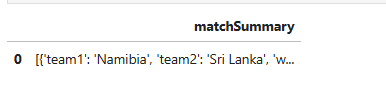

In [71]:
with open('t20_wc_match_results.json') as f:
    data = json.load(f)
df_match = pd.DataFrame(data[0]['matchSummary'])
df_match.head()

,team1,team2,winner,margin,ground,matchDate,scorecard
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


In [72]:
## df_match.shape

#### Rename column 'scorecard' to 'match_id'. This column would be considered as a primary key and will be helpful while joining with other tables and for future analysis.

In [73]:
df_match.rename(columns={'scorecard' : 'match_id'},inplace=True)
df_match.head()

,team1,team2,winner,margin,ground,matchDate,match_id
0,Namibia,Sri Lanka,Namibia,55 runs,Geelong,"Oct 16, 2022",T20I # 1823
1,Netherlands,U.A.E.,Netherlands,3 wickets,Geelong,"Oct 16, 2022",T20I # 1825
2,Scotland,West Indies,Scotland,42 runs,Hobart,"Oct 17, 2022",T20I # 1826
3,Ireland,Zimbabwe,Zimbabwe,31 runs,Hobart,"Oct 17, 2022",T20I # 1828
4,Namibia,Netherlands,Netherlands,5 wickets,Geelong,"Oct 18, 2022",T20I # 1830


#### Here, Our aim to to create a dictionary which looks something like this  :

{
    "Namibia Vs Srilanka" : "T20I # 1823",
    
    "Srilanka Vs Namibia" : "T20I # 1823",
    
    "Netherlands Vs UAE" : "T20I # 1825",
    
    "UAE Vs Netherlands" : "T20I # 1825"
}

Below, the Batting Summary df doesn't have any match_id column. The purpose is to map this dictionary keys with the match_column (df_batting dataframe) and create a match_id column which is the value of the dictionary

In [74]:
match_ids_dict = {}

for index, row in df_match.iterrows():
    key1 = row['team1'] + ' '+ 'Vs' + ' ' + row['team2']
    key2 = row['team2'] + ' '+ 'Vs' + ' ' + row['team1']
    
    match_ids_dict[key1] = row['match_id']
    match_ids_dict[key2] = row['match_id']

match_ids_dict

{'Namibia Vs Sri Lanka': 'T20I # 1823',
 'Sri Lanka Vs Namibia': 'T20I # 1823',
 'Netherlands Vs U.A.E.': 'T20I # 1825',
 'U.A.E. Vs Netherlands': 'T20I # 1825',
 'Scotland Vs West Indies': 'T20I # 1826',
 'West Indies Vs Scotland': 'T20I # 1826',
 'Ireland Vs Zimbabwe': 'T20I # 1828',
 'Zimbabwe Vs Ireland': 'T20I # 1828',
 'Namibia Vs Netherlands': 'T20I # 1830',
 'Netherlands Vs Namibia': 'T20I # 1830',
 'Sri Lanka Vs U.A.E.': 'T20I # 1832',
 'U.A.E. Vs Sri Lanka': 'T20I # 1832',
 'Ireland Vs Scotland': 'T20I # 1833',
 'Scotland Vs Ireland': 'T20I # 1833',
 'West Indies Vs Zimbabwe': 'T20I # 1834',
 'Zimbabwe Vs West Indies': 'T20I # 1834',
 'Netherlands Vs Sri Lanka': 'T20I # 1835',
 'Sri Lanka Vs Netherlands': 'T20I # 1835',
 'Namibia Vs U.A.E.': 'T20I # 1836',
 'U.A.E. Vs Namibia': 'T20I # 1836',
 'Ireland Vs West Indies': 'T20I # 1837',
 'West Indies Vs Ireland': 'T20I # 1837',
 'Scotland Vs Zimbabwe': 'T20I # 1838',
 'Zimbabwe Vs Scotland': 'T20I # 1838',
 'Australia Vs New Zea

In [75]:
df_match.shape

(45, 7)

In [76]:
df_match.describe()

,team1,team2,winner,margin,ground,matchDate,match_id
count,45,45,45,45,45,45,45
unique,14,13,17,28,7,25,45
top,Netherlands,Zimbabwe,England,5 wickets,Hobart,"Nov 6, 2022",T20I # 1823
freq,5,8,5,7,9,3,1


In [77]:
df_match.to_csv('dim_match_summary.csv', index = False)

 <h4 style="color:blue">(2) Process Batting Summary</h4>

In [78]:
with open('t20_wc_batting_summary.json') as f:
    data = json.load(f)
    
    all_records = []
    
    for rec in data:
        all_records.extend(rec['battingSummary'])   # Treating each record as an array and storing them in all_records as list of list. LOL can be then converted into a df
df_batting = pd.DataFrame(all_records)  
df_batting.head(10)

,match,teamInnings,battingPos,batsmanName,dismissal,runs,balls,4s,6s,SR
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,c Pramod Madushan b Chameera,3,6,0,0,50.00
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,c Shanaka b Pramod Madushan,9,9,1,0,100.00
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,c â Mendis b Karunaratne,20,12,1,2,166.66
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,c DM de Silva b Pramod Madushan,26,24,2,0,108.33
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),c Gunathilaka b PWH de Silva,20,24,0,0,83.33
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,run out (Gunathilaka/â Mendis),44,28,4,0,157.14
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,c â Mendis b Theekshana,0,1,0,0,0.00
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,,31,16,2,2,193.75
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,c Smit b Shikongo,9,10,1,0,90.00
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ,c â Green b Wiese,6,6,0,0,100.00


In [79]:
df_batting["out/not_out"]  = df_batting['dismissal'].apply(lambda x: "out" if len(x) > 0 else "not_out")
df_batting.drop(labels= "dismissal", axis = 'columns', inplace = True)
df_batting.head(10)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendisâ,6,6,0,0,100.00,out


In [80]:
df_batting['batsmanName'] = df_batting['batsmanName'].str.replace('â', '')
df_batting['batsmanName'] = df_batting['batsmanName'].str.replace('\xa0', '')
df_batting.head(10)

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out
5,Namibia Vs Sri Lanka,Namibia,6,Jan Frylinck,44,28,4,0,157.14,out
6,Namibia Vs Sri Lanka,Namibia,7,David Wiese,0,1,0,0,0.00,out
7,Namibia Vs Sri Lanka,Namibia,8,JJ Smit,31,16,2,2,193.75,not_out
8,Namibia Vs Sri Lanka,Sri Lanka,1,Pathum Nissanka,9,10,1,0,90.00,out
9,Namibia Vs Sri Lanka,Sri Lanka,2,Kusal Mendis,6,6,0,0,100.00,out


In [81]:
df_batting["match_id"] = df_batting["match"].map(match_ids_dict)
df_batting

,match,teamInnings,battingPos,batsmanName,runs,balls,4s,6s,SR,out/not_out,match_id
0,Namibia Vs Sri Lanka,Namibia,1,Michael van Lingen,3,6,0,0,50.00,out,T20I # 1823
1,Namibia Vs Sri Lanka,Namibia,2,Divan la Cock,9,9,1,0,100.00,out,T20I # 1823
2,Namibia Vs Sri Lanka,Namibia,3,Jan Nicol Loftie-Eaton,20,12,1,2,166.66,out,T20I # 1823
3,Namibia Vs Sri Lanka,Namibia,4,Stephan Baard,26,24,2,0,108.33,out,T20I # 1823
4,Namibia Vs Sri Lanka,Namibia,5,Gerhard Erasmus(c),20,24,0,0,83.33,out,T20I # 1823
...,...,...,...,...,...,...,...,...,...,...,...
694,Pakistan Vs England,England,3,Phil Salt,10,9,2,0,111.11,out,T20I # 1879
695,Pakistan Vs England,England,4,Ben Stokes,52,49,5,1,106.12,not_out,T20I # 1879
696,Pakistan Vs England,England,5,Harry Brook,20,23,1,0,86.95,out,T20I # 1879
697,Pakistan Vs England,England,6,Moeen Ali,19,13,3,0,146.15,out,T20I # 1879


In [82]:
df_batting.shape

(699, 11)

In [83]:
df_batting.describe()

,battingPos
count,699.000000
mean,4.979971
std,2.813628
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,11.000000


In [84]:
df_batting.to_csv('fact_bating_summary.csv', index = False)

<h4 style="color:blue">(3) Process Bowling Summary</h4>

In [85]:
with open('t20_wc_bowling_summary.json') as f:
    data = json.load(f)
    
    all_records = []
    
    for rec in data:
        all_records.extend(rec['bowlingSummary'])
        
#print(all_records)

In [86]:
df_bowling = pd.DataFrame(all_records)
df_bowling

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Pakistan Vs England,Pakistan,Naseem Shah,4,0,30,0,7.50,15,3,1,1,0
496,Pakistan Vs England,Pakistan,Haris Rauf,4,0,23,2,5.75,13,3,0,1,0
497,Pakistan Vs England,Pakistan,Shadab Khan,4,0,20,1,5.00,10,1,0,0,0
498,Pakistan Vs England,Pakistan,Mohammad Wasim,4,0,38,1,9.50,5,5,0,2,0


In [87]:
df_bowling.shape

(500, 13)

In [88]:
df_bowling.describe()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
count,500,500,500,500,500,500,500,500,500,500,500,500,500
unique,42,16,132,15,3,50,6,100,19,9,6,6,4
top,Namibia Vs Netherlands,Netherlands,Maheesh Theekshana,4,0,24,0,8.00,8,1,0,0,0
freq,14,51,8,255,484,28,187,33,46,141,270,294,461


In [89]:
df_bowling['match_id'] = df_bowling['match'].map(match_ids_dict)
df_bowling.head()

,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls,match_id
0,Namibia Vs Sri Lanka,Sri Lanka,Maheesh Theekshana,4,0,23,1,5.75,7,0,0,2,0,T20I # 1823
1,Namibia Vs Sri Lanka,Sri Lanka,Dushmantha Chameera,4,0,39,1,9.75,6,3,1,2,0,T20I # 1823
2,Namibia Vs Sri Lanka,Sri Lanka,Pramod Madushan,4,0,37,2,9.25,6,3,1,0,0,T20I # 1823
3,Namibia Vs Sri Lanka,Sri Lanka,Chamika Karunaratne,4,0,36,1,9.00,7,3,1,1,0,T20I # 1823
4,Namibia Vs Sri Lanka,Sri Lanka,Wanindu Hasaranga de Silva,4,0,27,1,6.75,8,1,1,0,0,T20I # 1823


In [90]:
df_bowling.to_csv('fact_bowling_summary.csv', index = False)

<h4 style="color:blue">(4) Process Players Information</h4>

In [91]:
with open('t20_wc_player_info.json') as f:
    data = json.load(f)
    
#print(data)

df_players = pd.DataFrame(data)
df_players.head(50)

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendisâ,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


In [92]:
df_players.tail(50)

,name,team,battingStyle,bowlingStyle,playingRole,description
169,Lungi Ngidi,South Africa,Right hand Bat,Right arm Fast medium,Bowler,"A tall, imposing paceman, Lungi Ngidi can reac..."
170,Keshav Maharaj,South Africa,Right hand Bat,Slow Left arm Orthodox,Bowler,"A left-arm spinner from Northwood Boys High, t..."
171,Anrich Nortje,South Africa,Right hand Bat,Right arm Fast,Bowler,Anrich Nortje is a genuine quick who has been ...
172,Timm van der Gugten,Netherlands,Right hand Bat,Right arm Fast medium,Bowler,"Timm van der Gugten, born in Sydney, made his ..."
173,Finn Allen,New Zealand,Right hand Bat,,Top order Batter,
174,Devon Conwayâ,New Zealand,Left hand Bat,Right arm Medium,Wicketkeeper Batter,
175,Kane Williamson(c),New Zealand,Right hand Bat,Right arm Offbreak,Top order Batter,By the time Kane Williamson is finished with p...
176,Glenn Phillips,New Zealand,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Glenn Phillips is a top-order wicketkeeper-bat...
177,James Neesham,New Zealand,Left hand Bat,Right arm Medium fast,Batting Allrounder,"Allrounder, and Twitter star, Jimmy Neesham we..."
178,Tim David,Australia,Right hand Bat,Right arm Offbreak,Middle order Batter,Mumbai Indians' decision to sign Tim David for...


In [93]:
df_players.shape

(219, 6)

In [94]:
df_players.describe()

,name,team,battingStyle,bowlingStyle,playingRole,description
count,219,219,219,219,219,219
unique,219,16,2,18,10,147
top,Michael van Lingen,Sri Lanka,Right hand Bat,Right arm Offbreak,Bowler,
freq,1,16,157,52,71,68


In [95]:
df_players['name'] = df_players['name'].str.replace('â', '')
df_players['name'] = df_players['name'].str.replace('\xa0', '')

In [96]:
df_players.head(10)

,name,team,battingStyle,bowlingStyle,playingRole,description
0,Michael van Lingen,Namibia,Left hand Bat,Left arm Medium,Bowling Allrounder,
1,Divan la Cock,Namibia,Right hand Bat,Legbreak,Opening Batter,
2,Jan Nicol Loftie-Eaton,Namibia,Left hand Bat,"Right arm Medium, Legbreak",Batter,
3,Stephan Baard,Namibia,Right hand Bat,Right arm Medium fast,Batter,
4,Gerhard Erasmus(c),Namibia,Right hand Bat,Right arm Offbreak,Allrounder,
5,Jan Frylinck,Namibia,Left hand Bat,Left arm Fast medium,Allrounder,
6,David Wiese,Namibia,Right hand Bat,Right arm Medium fast,Allrounder,David Wiese joined a marked outflow of South A...
7,JJ Smit,Namibia,Right hand Bat,Left arm Medium fast,Bowling Allrounder,
8,Pathum Nissanka,Sri Lanka,Right hand Bat,,Top order Batter,
9,Kusal Mendis,Sri Lanka,Right hand Bat,Legbreak,Wicketkeeper Batter,"Blessed with a compact technique, an aggressiv..."


In [97]:
df_players.to_csv('dim_players_no_images.csv', index = False)

In [98]:
df_players[df_players['team'] == 'India']

,name,team,battingStyle,bowlingStyle,playingRole,description
127,KL Rahul,India,Right hand Bat,,Opening Batter,"A tall, elegant right-hand batsman who can kee..."
128,Rohit Sharma(c),India,Right hand Bat,Right arm Offbreak,Top order Batter,"Languid and easy on the eye, Rohit Sharma owne..."
129,Virat Kohli,India,Right hand Bat,Right arm Medium,Top order Batter,India has given to the world many a great cric...
130,Suryakumar Yadav,India,Right hand Bat,"Right arm Medium, Right arm Offbreak",Batter,Hard-hitting 360-degree batter Suryakumar Yada...
131,Axar Patel,India,Left hand Bat,Slow Left arm Orthodox,Bowling Allrounder,Left-arm spinner Axar Patel has been increasin...
132,Hardik Pandya,India,Right hand Bat,Right arm Medium fast,Allrounder,Hardik Pandya swears by living life king size ...
133,Dinesh Karthik,India,Right hand Bat,Right arm Offbreak,Wicketkeeper Batter,Not many would forget the sight of Dinesh Kart...
134,Ravichandran Ashwin,India,Right hand Bat,Right arm Offbreak,Bowling Allrounder,R Ashwin took the tricks and skills he learned...
135,Bhuvneshwar Kumar,India,Right hand Bat,Right arm Medium,Bowler,"At the time of his India debut in 2012, Bhuvne..."
136,Arshdeep Singh,India,Left hand Bat,Left arm Medium fast,Bowler,
